In [127]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [128]:
# Testing my logistic regression with data and code from
# https://pylessons.com/Logistic-Regression-part4/

In [129]:
ROWS = 64
COLS = 64
CHANNELS = 3

TRAIN_DIR = '../../LogReg/Train_data/'
TEST_DIR = '../../LogReg/Test_data/'

# use this to read full dataset
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [130]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [131]:
def prepare_data(images):
    m = len(images)
    X = np.zeros((m, ROWS, COLS, CHANNELS),dtype=np.uint8)
    y = np.zeros((1, m))
    for i, image_file in enumerate(images):
        X[i,:] = read_image(image_file)
        if 'dog' in image_file.lower():
            y[0, i] = 1
        elif 'cat' in image_file.lower():
            y[0, i] = 0
    return X, y

In [132]:
train_set_x, train_set_y = prepare_data(train_images)
test_set_x, test_set_y = prepare_data(test_images)

In [133]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], CHANNELS*COLS*ROWS)
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1)

In [134]:
print("train_set_x shape " + str(train_set_x.shape))
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape " + str(test_set_x.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape (6002, 64, 64, 3)
train_set_x_flatten shape: (6002, 12288)
train_set_y shape: (1, 6002)
test_set_x shape (1000, 64, 64, 3)
test_set_x_flatten shape: (1000, 12288)
test_set_y shape: (1, 1000)


In [135]:
# 6002 images with 12288 features

In [136]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [137]:
# Train on 100 images
train_x_small = train_set_x[:100]
train_y_small = train_set_y[:,:100].T

In [138]:
def gradient_descent(w, X, b, y, alpha, calcLoss=False):
    """
    Perform one iteration of gradient descent.
    n is amount of features.
    m is amount of examples.
    
    w     -- (nx1) array -- weights  (also called parameters theta)
    X     -- (mxn) array -- features 
    b     -- float       -- bias   
    y     -- (mx1) array -- true labels 
    alpha -- float       -- learning rate
    calcLoss -- bool -- whether to calculate and return the loss value
    
    Returns 
    w -- updated weights
    b -- updated biases
    
    """
    m = np.shape(X)[0]
    invm = 1/m
    
    # prediction
    yhat = sigmoid(np.dot(X,w)+b)
    # error
    err = yhat - y
    # derivative w.r.t the weights
    dw = invm * np.dot(X.T,err)
    # derivative w.r.t. the bias
    db = invm * np.sum(err)
    
    # Update weights and biases
    w -= alpha*dw
    b -= alpha*db
    
    if calcLoss:
        # calculate loss before the update
        loss = bincrossent(y,yhat)
        return w, b, loss
    else:        
        return w, b

In [139]:
def sigmoid(X):
    """
    Calculate the sigmoid function for vector X
    """
    return 1/(1+np.exp(-X))

In [150]:
def bincrossent(y, yhat):
    """
    Given yhat and y
    Calculate the binary cross entropy
    """
    m = np.shape(yhat)[0]
        
    return -1/m *( np.dot(y.T,np.log(yhat)) + np.dot(
                                        (1-y).T,np.log(1-yhat)) )

In [157]:
print (train_x_small.shape)
print (train_y_small.shape)

# Initialize weights and biases
w = np.zeros((train_x_small.shape[1],1))
b = 0
# Very first prediction
yhat = sigmoid(np.dot(train_x_small,w)+b)
loss = bincrossent(train_y_small,yhat)


numit = 10000
loss = np.zeros(numit)

i = 0
alpha = 0.001
for i in range(numit):
    w, b, loss[i] = gradient_descent(w, train_x_small, b
                                     , train_y_small, alpha, True)
    

(100, 12288)
(100, 1)


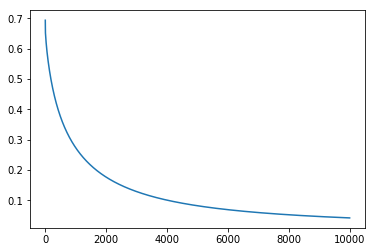

In [158]:
plt.plot(loss)
plt.show()


[0.83713301]
[[0.04159137]]
Amount predict dog 61.0
Amount predict cat 39.0
Amount dog:  61.0
Amount incorrect: 0.0
[]


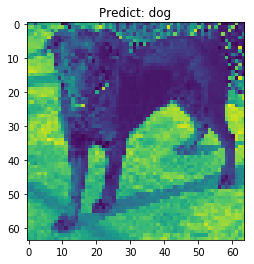

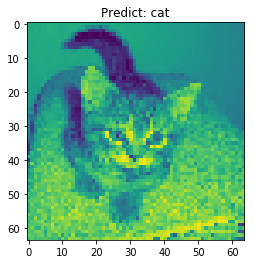

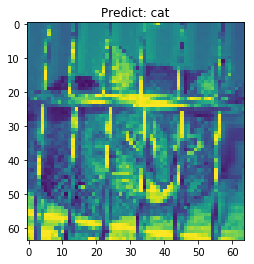

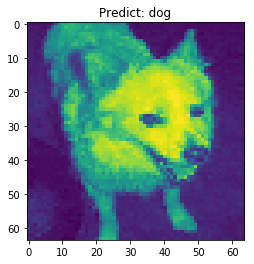

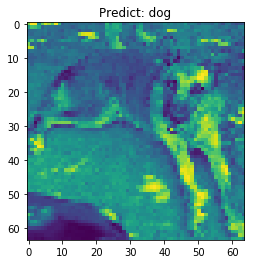

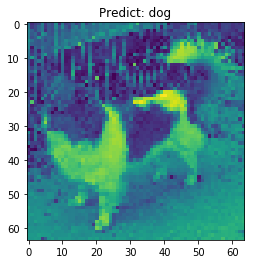

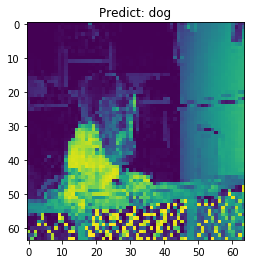

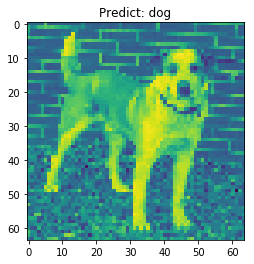

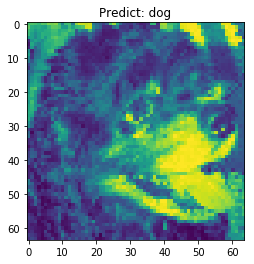

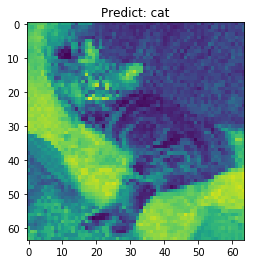

In [159]:
yhat = sigmoid(np.dot(train_x_small,w)+b)

print (yhat[87])
print (bincrossent(train_y_small,yhat))

yhat[yhat > 0.5] = 1
yhat[yhat < 0.5] = 0
print ("Amount predict dog", np.sum(yhat))
print ("Amount predict cat", len(yhat)-np.sum(yhat))

print ("Amount dog: ", np.sum(train_y_small))

print ('Amount incorrect:', np.sum(np.abs(yhat-train_y_small)))
print (np.where(np.abs(yhat-train_y_small))[0])


for i in range(10):
    if yhat[i] == 1:
        predict = 'dog'
    else:
        predict = 'cat'
    plt.title(f"Predict: {predict}")
    plt.imshow(train_x_small[i].reshape(64,64,3)[:,:,0])
    plt.show()